In [1]:
import pandas as pd
import numpy as np
import pyreadr
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Modelo de Regressão Não Linear Múltipla <br>
## Transformação de Box-Cox

Exmplo da aula do MBA DSA USP/ESALQ com Prof. Fávero e Belfiore

## Aplicação MQO (OLS)

1) Estimação do modelo linear com stepwise<br>
2) Aplica teste Shapiro Francia nos resíduos:<br>
- Deu aderência à normalidade? Modelo validado <br>
- Não deu aderência à normalidade? Aplica transformação Box-Cox <br>

3) Aplica modelo novamente com stepwise<br>
4) Aplica teste shapiro Francia novamente nos resíduos:



## Contexto

Fonte: Compustat Global - Universidade de Wharton/Pensilvânia

 - Empresa;
 - Retorno;
 - Disclosure: nota de 0 a 100 que corresponde à transparência sobre divulgação das demonstrações financeiras;
 - Endividamento;
 - Ativos;
 - Liquidez;

In [2]:
#Importa base e transforma em objeto
rData = pyreadr.read_r(r'bases\empresas.RData')

#Verifica o nomne do objeto
print(rData.keys())

odict_keys(['empresas'])


In [3]:
#Transforma o objeto em um pandas DataFrame
empresas = rData['empresas']
empresas.head()

,empresa,retorno,disclosure,endividamento,ativos,liquidez
0,Adidas,63.67,83.0,1.3,3967.0,14.3
1,BASF,55.49,91.0,33.9,5450.0,16.8
2,Bayer,52.42,77.0,36.1,4327.0,15.5
3,BSH,54.00,90.0,20.8,4109.0,16.8
4,Bosch,68.01,93.0,14.1,4458.0,17.0


## Análise das Correlações

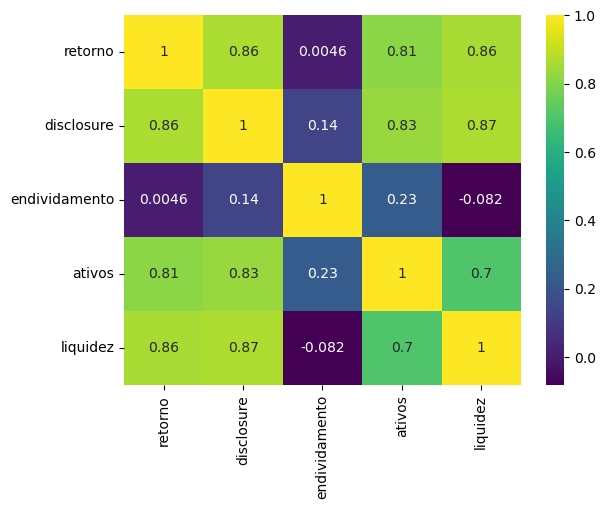

In [4]:
matriz_corr = empresas.corr()

#Gráfico matriz correlação

sns.heatmap(matriz_corr, cmap='viridis', annot=True)
plt.show()

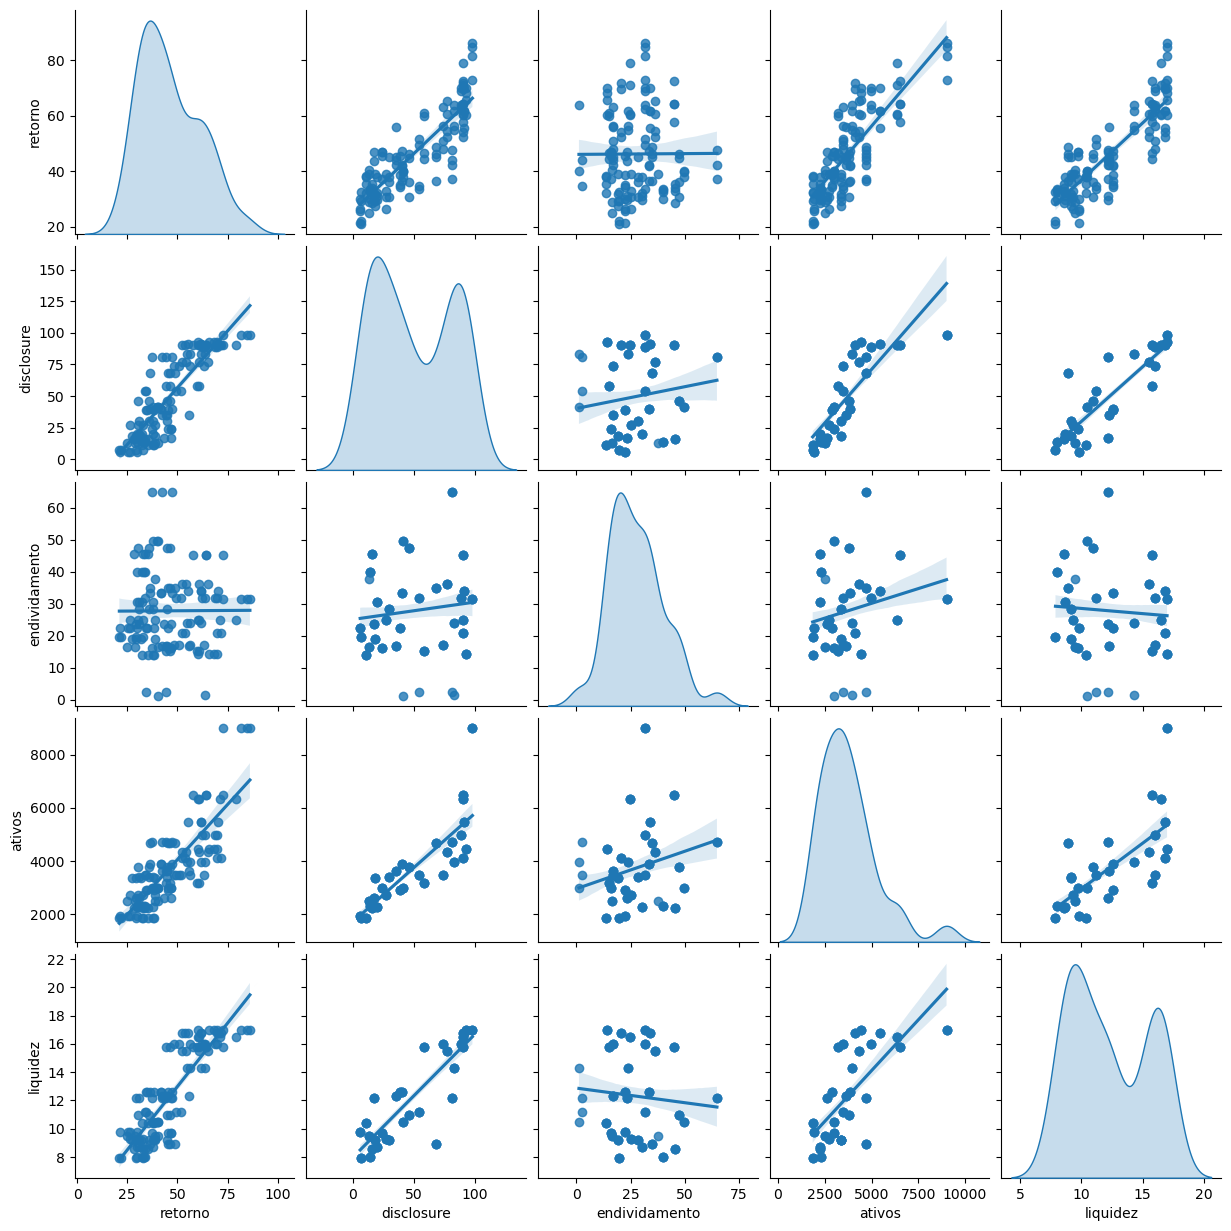

In [5]:
#Scatter Matrix
sns.pairplot(empresas.iloc[:,1:], diag_kind='kde', kind='reg')
plt.show()

In [6]:
y = empresas.retorno
X = empresas.iloc[:,2:]
X

,disclosure,endividamento,ativos,liquidez
0,83.0,1.3,3967.0,14.3
1,91.0,33.9,5450.0,16.8
2,77.0,36.1,4327.0,15.5
3,90.0,20.8,4109.0,16.8
4,93.0,14.1,4458.0,17.0
...,...,...,...,...
119,41.0,49.5,2996.0,10.5
120,35.0,16.8,3622.0,12.3
121,24.0,16.1,2972.0,9.7
122,68.0,34.8,4691.0,8.9


In [7]:
#Estimando o modelo
#https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS
import statsmodels.api as sm

modelo_linear = sm.OLS.from_formula(formula = 'retorno ~ disclosure+endividamento+ativos+liquidez', data=empresas).fit()
modelo_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                retorno   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     147.9
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           3.35e-45
Time:                        20:01:45   Log-Likelihood:                -401.07
No. Observations:                 124   AIC:                             812.1
Df Residuals:                     119   BIC:                             826.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.0506      4.080      1.483      0.141      -2.028      14.129
disclosure        0.1067      0.048      2.227      0.028       0.012       0.202
endividamento    -0.0882      0.051     -1.723      0.087      -0.190       0.013
ativos            0.0035      0.001      5.134      0.000       0.002       0.005
liquidez          1.9762      0.396      4.987      0.000       1.191       2.761
==============================================================================
Omnibus:                       35.509   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.127
Skew:                          -0.136   Prob(JB):                       0.0283
Kurtosis:                       1.858   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Procedimento Stepwise

Retirar o parâmetro que apresentar um p-value > 0,05 do maior para o menor a cada rodada.<br>

O primeiro a ser retirado será o endividademento com p-value = 0,087

In [8]:
modelo_stepwise = sm.OLS.from_formula(formula = 'retorno ~ disclosure+ativos+liquidez', data=empresas).fit()
modelo_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                retorno   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     193.1
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           9.55e-46
Time:                        20:02:06   Log-Likelihood:                -402.60
No. Observations:                 124   AIC:                             813.2
Df Residuals:                     120   BIC:                             824.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0461      3.380      0.605      0.546      -4.647       8.739
disclosure     0.0874      0.047      1.861      0.065      -0.006       0.180
ativos         0.0032      0.001      4.850      0.000       0.002       0.005
liquidez       2.2507      0.366      6.152      0.000       1.526       2.975
==============================================================================
Omnibus:                       18.497   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.349
Skew:                          -0.103   Prob(JB):                       0.0689
Kurtosis:                       2.003   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
modelo_stepwise = sm.OLS.from_formula(formula = 'retorno ~ ativos+liquidez', data=empresas).fit()
modelo_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                retorno   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     282.1
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.76e-46
Time:                        20:02:18   Log-Likelihood:                -404.37
No. Observations:                 124   AIC:                             814.7
Df Residuals:                     121   BIC:                             823.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5348      2.341     -1.083      0.281      -7.169       2.100
ativos         0.0040      0.001      7.649      0.000       0.003       0.005
liquidez       2.7391      0.258     10.637      0.000       2.229       3.249
==============================================================================
Omnibus:                       23.591   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.887
Skew:                          -0.087   Prob(JB):                       0.0527
Kurtosis:                       1.947   Cond. No.                     1.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Disclosure não é estatisticamente significante para explicar o retorno na presença dos parâmetros Ativos e Liquidez <b>
    
Porém, individualmente ela é estatisticamente significante para explicar o retorno

In [10]:
modelo_auxiliar = sm.OLS.from_formula(formula = 'retorno ~ disclosure', data=empresas).fit()
modelo_auxiliar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                retorno   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     358.4
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           4.06e-38
Time:                        20:02:19   Log-Likelihood:                -426.89
No. Observations:                 124   AIC:                             857.8
Df Residuals:                     122   BIC:                             863.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5533      1.288     19.845      0.000      23.004      28.102
disclosure     0.4155      0.022     18.932      0.000       0.372       0.459
==============================================================================
Omnibus:                        0.701   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.704   Jarque-Bera (JB):                0.315
Skew:                           0.007   Prob(JB):                        0.854
Kurtosis:                       3.246   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comparativo dos Parâmetros que mais Explicam o Retorno

Não podemos comparar ativos com liquidez por estarem em escalas diferentes, é necessário padronizar os valores.

In [11]:
conf_int = modelo_stepwise.conf_int()
conf_int

,0,1
Intercept,-7.169132,2.099624
ativos,0.002981,0.005063
liquidez,2.229282,3.248873


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(empresas.iloc[:,4:])

empresas_pad = pd.DataFrame(scaler.transform(empresas.iloc[:,4:]))
empresas_pad.columns = ['zAtivo', 'zLiquidez']
empresas_pad = empresas.join(empresas_pad)
empresas_pad

,empresa,retorno,disclosure,endividamento,ativos,liquidez,zAtivo,zLiquidez
0,Adidas,63.67,83.0,1.3,3967.0,14.3,0.148755,0.639171
1,BASF,55.49,91.0,33.9,5450.0,16.8,1.116591,1.438135
2,Bayer,52.42,77.0,36.1,4327.0,15.5,0.383699,1.022674
3,BSH,54.00,90.0,20.8,4109.0,16.8,0.241427,1.438135
4,Bosch,68.01,93.0,14.1,4458.0,17.0,0.469192,1.502052
...,...,...,...,...,...,...,...,...
119,DuPont,39.85,41.0,49.5,2996.0,10.5,-0.484939,-0.575254
120,ExxonMobil,44.16,35.0,16.8,3622.0,12.3,-0.076399,0.000000
121,FedEx,45.38,24.0,16.1,2972.0,9.7,-0.500602,-0.830923
122,Ford Motors,45.25,68.0,34.8,4691.0,8.9,0.621253,-1.086591


In [13]:
modelo_pad = sm.OLS.from_formula(formula='retorno ~ zAtivo+zLiquidez', data=empresas_pad).fit()
modelo_pad.conf_int()

,0,1
Intercept,45.059886,47.331081
zAtivo,4.568109,7.758460
zLiquidez,6.975541,10.165892


A Liquidez é a varívale que melhor explica o retorno.

### Teste de Verificação da Aderência dos Resíduos à Normalidade (Shapiro-Francia)

Caso os erros não sigam uma distribuição normal, o modelo não é adequado para fins preditivos. <br>
Os betas não são ajustados para que consigam fazer inferência a partir dos intervalos de confiança daqueles parâmetros e construção de cenários.

> Teste Shapiro-Francia: n >= 30

> Teste Shapiro-Wilk: n < 30


onde,

 - H0: Diferênças não são estatisticamente significantes (existe aderência à normalidade);
 - H1: Diferênças são estatisticamente significantes (não é uma normal)
 
p-value < 0,05 rejeita-se H0

In [31]:
from scipy.stats import shapiro

stat, p_value = shapiro(modelo_stepwise.resid)
stat , p_value

(0.968277096748352, 0.0051298970356583595)

<AxesSubplot:>

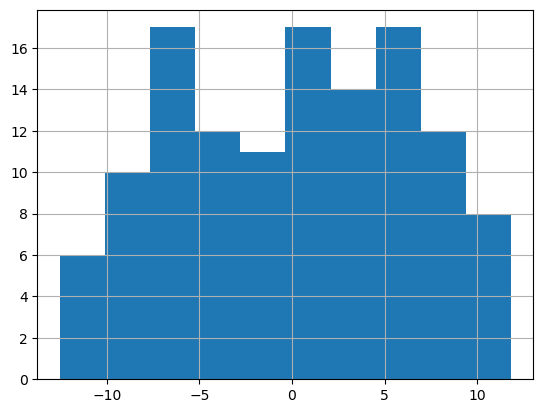

In [15]:
modelo_stepwise.resid.hist()

Não é aderente à normalidade



### Transformação de Box-Cox

O modelo não possui resíduos aderentes à normalidade. Devemos transformar a variável Y em uma normal aplicando o método de Box Cox:
<br>
<br>

<center><img src='img\box_cox.jpg'></center>


- Lâmbda 1: linear
- Lâmbda 2: quadrática
- Lâmbda 3: cúbica
- Lâmbda -1: inversa
- Lâmbda 0,5: raiz
- Lâmbda -0,5: raiz inversa
- Lâmbda 0: ln(y

Lâmbda varia de -infinito a +infinito.

<b>Objetivo é encontrar qual o lâmbda que maximiza a aderência do Y à normalidade.</b>


<b> A padronização pelo Z-Score NÃO normaliza, a distribuição se mantém a mesma.<b>

In [16]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
from scipy import stats

y_lamb, lambida_otimo = stats.boxcox(empresas.retorno)
lambida_otimo

-0.022564100754067663

In [17]:
empresas['bc_retorno'] = y_lamb
empresas

,empresa,retorno,disclosure,endividamento,ativos,liquidez,bc_retorno
0,Adidas,63.67,83.0,1.3,3967.0,14.3,3.965002
1,BASF,55.49,91.0,33.9,5450.0,16.8,3.839599
2,Bayer,52.42,77.0,36.1,4327.0,15.5,3.787582
3,BSH,54.00,90.0,20.8,4109.0,16.8,3.814731
4,Bosch,68.01,93.0,14.1,4458.0,17.0,4.024999
...,...,...,...,...,...,...,...
119,DuPont,39.85,41.0,49.5,2996.0,10.5,3.536070
120,ExxonMobil,44.16,35.0,16.8,3622.0,12.3,3.630464
121,FedEx,45.38,24.0,16.1,2972.0,9.7,3.655476
122,Ford Motors,45.25,68.0,34.8,4691.0,8.9,3.652844


### Estimando Novo Modelo OLS com a Variável Dependente Transformada

<b> Os PARÂMETROS do modelo_linear e do modelo_bc NÂO são comparáveis!<br>
    Devemos fazer a transformação inversa usando o LAMBDA ÓTIMO </b>

In [18]:
modelo_bc = sm.OLS.from_formula(formula = 'bc_retorno ~ disclosure+endividamento+ativos+liquidez', data=empresas).fit()
modelo_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bc_retorno   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     119.9
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           8.80e-41
Time:                        20:02:44   Log-Likelihood:                 74.551
No. Observations:                 124   AIC:                            -139.1
Df Residuals:                     119   BIC:                            -125.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.8844      0.088     32.752      0.000       2.710       3.059
disclosure        0.0034      0.001      3.291      0.001       0.001       0.005
endividamento    -0.0013      0.001     -1.133      0.260      -0.003       0.001
ativos         4.331e-05   1.46e-05      2.967      0.004    1.44e-05    7.22e-05
liquidez          0.0359      0.009      4.202      0.000       0.019       0.053
==============================================================================
Omnibus:                        3.781   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.267
Skew:                          -0.303   Prob(JB):                        0.195
Kurtosis:                       2.486   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Stepwise

In [19]:
modelo_bc = sm.OLS.from_formula(formula = 'bc_retorno ~ disclosure+ativos+liquidez', data=empresas).fit()
modelo_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bc_retorno   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     159.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.21e-41
Time:                        20:02:46   Log-Likelihood:                 73.887
No. Observations:                 124   AIC:                            -139.8
Df Residuals:                     120   BIC:                            -128.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8275      0.072     39.019      0.000       2.684       2.971
disclosure     0.0031      0.001      3.109      0.002       0.001       0.005
ativos      4.005e-05   1.43e-05      2.795      0.006    1.17e-05    6.84e-05
liquidez       0.0398      0.008      5.080      0.000       0.024       0.055
==============================================================================
Omnibus:                        2.714   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                2.472
Skew:                          -0.258   Prob(JB):                        0.290
Kurtosis:                       2.540   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
modelo_bc.conf_int()

,0,1
Intercept,2.684060,2.971011
disclosure,0.001137,0.005125
ativos,0.000012,0.000068
liquidez,0.024314,0.055367


<b>Uma variável no modelo múltiplo pode apresentar um beta não estatisticamente significante em função de:

1) A correlação entre ela e o Y já não é estatisticamente significante individualmente;<br>
2) Pode não ser considerada em função de problemas de correlação com outras variáveis explicativas (multicolinearidade); <br>
3) Na forma funcional não linear; </b>

### Aplicando Shapiro-Francia no Modelo Box-Cox

In [32]:
stat, p_value = shapiro(modelo_bc.resid)
stat , p_value

(0.9846760630607605, 0.17517398297786713)

<AxesSubplot:>

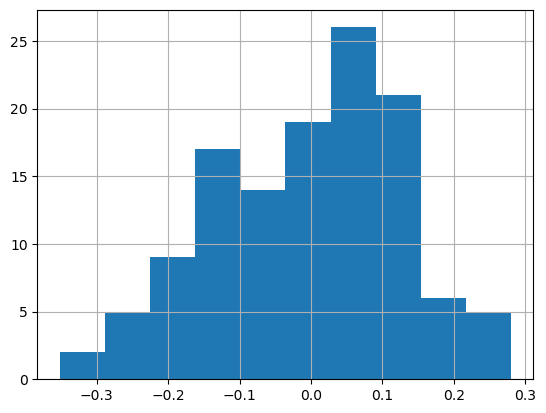

In [22]:
modelo_bc.resid.hist()

### Comparando Variáveis Explicativas

In [23]:
scaler = StandardScaler()

disclosure = np.array(empresas.iloc[:,2]).reshape(-1,1)
scaler.fit(disclosure)

empresas_pad['zDisclosure'] = scaler.transform(disclosure)
empresas_pad

,empresa,retorno,disclosure,endividamento,ativos,liquidez,zAtivo,zLiquidez,zDisclosure
0,Adidas,63.67,83.0,1.3,3967.0,14.3,0.148755,0.639171,1.067640
1,BASF,55.49,91.0,33.9,5450.0,16.8,1.116591,1.438135,1.323956
2,Bayer,52.42,77.0,36.1,4327.0,15.5,0.383699,1.022674,0.875403
3,BSH,54.00,90.0,20.8,4109.0,16.8,0.241427,1.438135,1.291917
4,Bosch,68.01,93.0,14.1,4458.0,17.0,0.469192,1.502052,1.388035
...,...,...,...,...,...,...,...,...,...
119,DuPont,39.85,41.0,49.5,2996.0,10.5,-0.484939,-0.575254,-0.278020
120,ExxonMobil,44.16,35.0,16.8,3622.0,12.3,-0.076399,0.000000,-0.470258
121,FedEx,45.38,24.0,16.1,2972.0,9.7,-0.500602,-0.830923,-0.822693
122,Ford Motors,45.25,68.0,34.8,4691.0,8.9,0.621253,-1.086591,0.587047


In [24]:
modelo_pad = sm.OLS.from_formula(formula='retorno ~ zAtivo+zLiquidez+zDisclosure', data=empresas_pad).fit()
modelo_pad.conf_int()

,0,1
Intercept,45.071183,47.319784
zAtivo,2.939757,6.995344
zLiquidez,4.776179,9.308936
zDisclosure,-0.173855,5.632343


## Prevendo Valores

In [26]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

model = LinearRegression()

variaveis = empresas[['disclosure', 'liquidez', 'ativos']]
# Ajustando intercepto

modelo_bc_predict = model.fit(variaveis, empresas.bc_retorno)


In [33]:
modelo_bc_predict.feature_names_in_

array(['disclosure', 'liquidez', 'ativos'], dtype=object)

In [27]:
# Ajustando intercepto
x_test = np.array([[50,14,4000]])


In [28]:
modelo_bc_predict.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.70201571])

In [29]:
(((3.702015 * -0.02256414) + 1)) ** (1 / -0.02256414)

47.74257511353707

### Salvando os Fitted Values dos Modelos Lineares e Box-Cox na Base

In [34]:
empresas['yhat_step_empresas'] = modelo_stepwise.fittedvalues
empresas['yhat_step_modelo_bc'] = (((modelo_bc.fittedvalues * lambida_otimo) + 1)) ** (1/lambida_otimo)
empresas

,empresa,retorno,disclosure,endividamento,ativos,liquidez,bc_retorno,yhat_step_empresas,yhat_step_modelo_bc
0,Adidas,63.67,83.0,1.3,3967.0,14.3,3.965002,52.590460,54.072393
1,BASF,55.49,91.0,33.9,5450.0,16.8,3.839599,65.403203,66.165319
2,Bayer,52.42,77.0,36.1,4327.0,15.5,3.787582,57.325376,56.706216
3,BSH,54.00,90.0,20.8,4109.0,16.8,3.814731,60.009319,62.161048
4,Bosch,68.01,93.0,14.1,4458.0,17.0,4.024999,61.960912,64.337230
...,...,...,...,...,...,...,...,...,...
119,DuPont,39.85,41.0,49.5,2996.0,10.5,3.536070,38.276327,38.078000
120,ExxonMobil,44.16,35.0,16.8,3622.0,12.3,3.630464,45.724617,41.446025
121,FedEx,45.38,24.0,16.1,2972.0,9.7,3.655476,35.988530,34.685312
122,Ford Motors,45.25,68.0,34.8,4691.0,8.9,3.652844,40.711577,41.929545


In [40]:
#Cria a reta de regressão das dispersões
from scipy.optimize import curve_fit
from scipy import stats

def func(x, a, b):
    return a * np.power(x, b)

popt_bc, pcov = curve_fit(func, empresas.retorno, empresas.yhat_step_modelo_bc)

x_fit_bc = np.linspace(32, 88, 50)
y_fit_bc = func(x_fit_bc, *popt_bc)


popt_lin, pcov = curve_fit(func, empresas.retorno, empresas.yhat_step_empresas)

x_fit_lin = np.linspace(32, 88, 50)
y_fit_lin = func(x_fit_bc, *popt_lin)


# Calcular a equação da reta linear
slope, intercept, r_value, p_value, std_err = stats.linregress(x=empresas.retorno, y=empresas.retorno)
element_line = intercept+slope*empresas.retorno

import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=empresas.retorno, y=empresas.yhat_step_empresas, mode='markers', name='yhat_linear'))
fig.add_trace(go.Scatter(x=empresas.retorno, y=empresas.yhat_step_modelo_bc, mode='markers', name='yhat_bc'))
#fig.add_trace(go.Scatter(x=x_fit_bc, y=y_fit_bc, mode='lines', name='Box-Cox'))
#fig.add_trace(go.Scatter(x=x_fit_lin, y=y_fit_lin, mode='lines', name='OLS Linear'))
fig.add_trace(go.Scatter(x=empresas.retorno, y=element_line, mode='lines', name='Ideal'))

fig.update_layout(
    
    xaxis_title='Retorno',
    yaxis_title='Fitted Values',
)

fig.show()